In [12]:
import chess
import random
from copy import deepcopy

In [13]:
board = chess.Board()

In [14]:
board.piece_map()

{63: Piece.from_symbol('r'),
 62: Piece.from_symbol('n'),
 61: Piece.from_symbol('b'),
 60: Piece.from_symbol('k'),
 59: Piece.from_symbol('q'),
 58: Piece.from_symbol('b'),
 57: Piece.from_symbol('n'),
 56: Piece.from_symbol('r'),
 55: Piece.from_symbol('p'),
 54: Piece.from_symbol('p'),
 53: Piece.from_symbol('p'),
 52: Piece.from_symbol('p'),
 51: Piece.from_symbol('p'),
 50: Piece.from_symbol('p'),
 49: Piece.from_symbol('p'),
 48: Piece.from_symbol('p'),
 15: Piece.from_symbol('P'),
 14: Piece.from_symbol('P'),
 13: Piece.from_symbol('P'),
 12: Piece.from_symbol('P'),
 11: Piece.from_symbol('P'),
 10: Piece.from_symbol('P'),
 9: Piece.from_symbol('P'),
 8: Piece.from_symbol('P'),
 7: Piece.from_symbol('R'),
 6: Piece.from_symbol('N'),
 5: Piece.from_symbol('B'),
 4: Piece.from_symbol('K'),
 3: Piece.from_symbol('Q'),
 2: Piece.from_symbol('B'),
 1: Piece.from_symbol('N'),
 0: Piece.from_symbol('R')}

In [15]:
# giving each piece its score, Capital mean white (bot), small mean black (human)
scoring= {'p': -1,
          'n': -3,
          'b': -3,
          'r': -5,
          'q': -9,
          'k': 0,
          'P': 1,
          'N': 3,
          'B': 3,
          'R': 5,
          'Q': 9,
          'K': 0,
          }

In [16]:
#simple evaluation function (need to improve)
def eval_board(BOARD):
    score = 0
    pieces = BOARD.piece_map()
    for key in pieces:
        score += scoring[str(pieces[key])]

    return score

In [17]:
# depth one min_max (need to make more than one depth because chess if fucking hard)
def most_value_agent(BOARD):
    moves = list(BOARD.legal_moves)
    scores = []
    for move in moves:
        #creates a copy of BOARD so we dont
        #change the original class
        temp = deepcopy(BOARD)
        temp.push(move)

        scores.append(eval_board(temp))

    if BOARD.turn == True:
        best_move = moves[scores.index(max(scores))]

    else:
        best_move = moves[scores.index(min(scores))]

    return best_move

In [18]:
def min_max2(BOARD):
    moves = list(BOARD.legal_moves)
    scores = []

    for move in moves:
        temp = deepcopy(BOARD)
        temp.push(move)
        temp_best_move = most_value_agent(temp)
        temp.push(temp_best_move)
        scores.append(eval_board(temp))

    if BOARD.turn == True:
        
        best_move = moves[scores.index(max(scores))]

    else:
        best_move = moves[scores.index(min(scores))]

    return best_move

In [95]:
#depth (N)
def min_maxN(BOARD,N):
    moves = list(BOARD.legal_moves)
    if(len(moves) ==0):
        return -1
    scores = []
    for move in moves:
        temp = deepcopy(BOARD)
        temp.push(move)

        if N>1:
            temp_best_move = min_maxN(temp,N-1)
            if(temp_best_move != -1):
                temp.push(temp_best_move)
            
        scores.append(eval_board(temp))
    
    if BOARD.turn == True:
        best_move = moves[scores.index(max(scores))]

    else:
        best_move = moves[scores.index(min(scores))]
    return best_move
        

In [84]:
def play_min_maxN(BOARD):
    N=3
    return min_maxN(BOARD,N)

In [59]:
board = chess.Board()

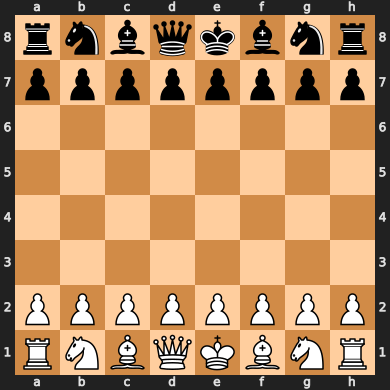

In [60]:
board

In [61]:
board.push_uci('d2d4')

Move.from_uci('d2d4')

In [62]:
def play_move():
    board.push(play_min_maxN(board))

In [63]:
play_move()

im here5
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
[]
3
im here1
[]
im here2
[]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
[]
2
im here1
[]
im here2
[]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . P . . . .
. . . . . . . N
P P P . P P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im h

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . P . . . .
. . . . B . . .
P P P . P P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here

im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p p p
. . . . .

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p p p
. . . . . n . B
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f6d5
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1]
im here5
r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . . . P
P P P . P P P .
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c6d4
im here1
[-1]
im here2
[-1]
im here5
r . b q k b n r
p p p p p p p p
. . n . . . . .
. . . . . . . .
. . . P . . . .
. . . . . N . .
P P P . P P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c6d4
im here1
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1]
im here2
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1]
im here5
r . b q k b n r
p p p p p p p p
. . n . . . . .
. . . . . . . .
. . . P . . . .
. . N . . . . .
P P P . P P P P
R . B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
i

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c6d4
im here1
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r . b q k b n r
p p p p p p p p
. . n . . . . .
. . . . . . . .
. . . P . . P .
. . . . . . . .
P P P . P P . P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]

[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0]
im here2
[0, 0, 0]
im here5
r . b q k b n r
p p p p p p p p
n . . . . . . .
. . . . . . . .
. . . P . . . .
. . . Q . . . .
P P P . P P P P
R N B . K B N R

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b n r
p p p p p p p p
n . . . . . . .
. . . P . . . .
. . . . . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b n r
p p p p p p p p
n . . . . . . .
. . . . . . . .
. . . P . . P .
. . . . . . . .
P P P . P P . P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im h

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8h7
im here1
[0]
im here2
[0]
im here5
r n b q k b n r
p p p p p p p .
. . . . . . . p
. . . . . . . .
. . . P . . . .
. . . . . N . .
P P P . P P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8h7
im here1
[0, 0, 0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p p .
. . . . . . . p
. . . P . . . .
. . . . . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8h7
im here1
[0, 0, 0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p p .
. . . . . . . p
. . . . . . . .
. . . P . P . .
. . . . . . . .
P P P . P . P P
R N B Q K

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p . p
. . . . . . p .
. . . . . . . .
. . . P . . . .
. . N . . . . .
P P P . P P P P
R . B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p . p
. . . . . . p .
. . . . . . . .
. . . P . . . .
. . P . . . . .
P P . . P P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here3
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g1h3
im here1
[0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p . p p
. . . . . p . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
[]
2
im here1
[]
im here2
[]
im here5
r n b q k b n r
p p p p p . p p
. . . . . p . .
. . . . . . . .
. . . P . . . .
. . . . . . . N
P P P . P P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p . p p
. . . . . p . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P N P P P P
R . B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p . p p
. . . . . p . .
. . . . . . . .
. . . P . . . .
P . . . . . . .
. P P . P P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1


im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8e7
im here1
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, -3, 0]
im here2
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, -3, 0]
im here5
r n b q k b n r
p

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8e7
im here1
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, -3, 0, -1, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, -3, 0, -1, 0, 0, 0]
im here5
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . . P . . . .
. . . . P . . .
P P P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d8h4
im here1
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, -3, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1]
im here2
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, -3, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1]
im here5
r n b q k b n r
p p p p . p p 

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f8b4
im here1
[0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, -3, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0

im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0]
im here2
[0]
im here5
r n b q k b n r
p p . p p p p p
. . p . . . . .
. . . . . . . .
. . . P . . . .
. . . . . N . .
P P P . P P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p . p p p p p
. . p . . . . .
. . . . . . . .
. . . P . . . .
N . . . . . . .
P P P . P P P P
R . B Q K B N R

im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p . p p p p p
. . p . . . . .
. . . . . . . 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0]
im here2
[0, 0]
im here5
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P K P P P P
R N B Q . B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . P .
P P P . P P . P
R N B Q K B N

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0]
im here5
r n b q k b n r
. p p p p p p p
p . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P B P P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im he

[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
. p p p p p p p
p . . . . . . .
. . . . . . . .
. . . P . . . .
. P . .

im here5
r n b q k b n r
p p p p p p p .
. . . . . . . .
. . . . . . . p
. . . P . . . .
. . . . . . . N
P P P . P P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 

[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8h7
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p p .
. . . . . . . .
. . . . . 

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8h7
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p p .
. . . . . . . .
. . . . . . . p
. . . P . . . .
P . . . . . . .
. P P . P P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0]
im here2
[0, 0]
im here5
r n b q k b n r
p p p p p p . p
. . . . . . . .
. . . . . . p .
. . . P . . . .
. . . . . . . .
P P P K P P P P
R N B Q . B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, 1, -3, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, 1, -3, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p . p
. . . . . . . .
. . . . . . p .
. . . P . . . .
. . . . . . . P
P P P . P P P .
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g5f4


[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p . p p
. . . . . . . B
. . . . . p . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[-3]
im here1
[-3, 0]
im here1
[-3, 0, 0]
im here1
[-3, 0, 0, 0]
im here1
[-3, 0, 0, 0, 0]
im here1
[-3, 0, 0, 0, 0

im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p . p p
. . . . . . . .
. .

[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
e5d4
im here1
[-1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -1, -1]
im here5
r n b q k b n r
p p p p . p p p
. . . . . . . B
. . . . p . . .
. . . P . . . .
. . . . . . . .
P 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
e5d4
im here1
[-1, -1, -1, -1, -1, -3, -3, -3, -1]
im here2
[-1, -1, -1, -1, -1, -3, -3, -3, -1]
im here5
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . P . . . .
. . . . . . . .
P P P B P P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f8b4
im here1
[-1, -1, -1, -1, -1, -3, -3, -3, -1, -1, -1, -3, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -1, -1, -3, -3, -3, -1, -1, -1, -3, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
P . . P . . . .
. . . . . . . .

1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here

im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here3
[-3, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0]
g1f3
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
im here2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
im here5
r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . 

im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c5d4
im here1
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1]
im here2
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1]
im here5
r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . . P . . . .
. . N . . . . .
P P P . P P P P
R . B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c5d4
im here1
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, -1]
im here2
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, -1]
im here5
r n b q k b 

im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c5d4
im here1
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
P . . P . . . .
. . . . . . . .
. P P . P P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]


im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0]
im here5
r n b q k b n r
p . p p p p p p
. . . . . . . .
. p . . . . . .
. . . P . . . .
. . . . . . . .
P P P B P P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p . p p p p p p
. . . . . . . .
. p . . . . . .
. . . P . . . .
. . P . . . . .
P P . . P P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b5a4
im here3
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0]
im here5
r n b q k b n r
. p p p p p p p
. . . . . . . .
p . . . . . . .
. . . P . . . .
. . . . B . . .
P P P . P P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
. p p p p p p p
. . . . . . . .
p . . . . . . .
. . . P . . . .
. . . . . . P .
P P P . P P . P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, -3,

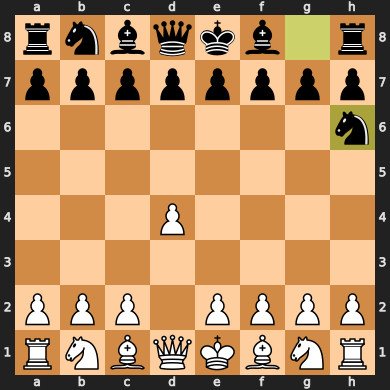

In [64]:
board

In [65]:
board.push_uci('e2e4')

Move.from_uci('e2e4')

In [66]:
play_move()

im here5
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R
[]
3
im here1
[]
im here2
[]
im here5
r n b q k b r .
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R
[]
2
im here1
[]
im here2
[]
im here5
r n b q k b r .
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . P P . . .
. . . . . . . N
P P P . . P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im h

[0, 0, 0, 0, -9]
im here1
[0, 0, 0, 0, -9, 0]
im here1
[0, 0, 0, 0, -9, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h6g4
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9]
im here5
r n b q k b r .
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
i

im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . P P . . .
. . N . .

im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p p p p p
. . . .

im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c6d4
im here1
[-1, -1, -1, -3, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1]
im here5
r . b q k b . r
p p p p p p p p
. . n . . . . n
. . . . . . . .
. . . P P . . .

im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c6d4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1]
im here5
r . b q k b . r
p p p p p p p p
. . n . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2]
im here1
[3, 3, 3, 3, 3, 2, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3]


im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c6e5
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1]
i

im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c6d4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r . b q k b . r
p p p p p p p p
. . n . . . . n
. . . . . . . .
P . . P P . . .
. . . . . . . .
. P P . . P P P
R N B Q K B N R
[]
1
i

im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b . r
p p p p p p p p
n . . . . . . n
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . K P P P
R N B Q . B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b . r
p p p p p p p p
n . . . . . . n
. . . . . . . .
. . . P P . . .
. . . . B . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0

im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b . r
p p p p p p p p
n . . . . . . n
. . . . . . . .
. . . P P . . P
. . . . . . . .
P P P . . P P .
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b8a6
im here1
[0, 0, 0, -3]
im here2
[0, 0, 0, -3]
im here5
r n b q k b n r
p p p p p p p p
. . . . . . . .
. B . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0,

im here5
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P P . . .
. . . Q . . . .
P P P . . P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . P . . .
. . . P . . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8h6
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
P . . P P . . .
. . . . . . . .
. P P . . P P P
R N B Q K B N R
[]
1
im

im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f5d4
im here1
[-1, -1, -1, -3, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . .
. . . . . n . .
. . . P P . . .
. . . . . . . .
P P P . B P P P
R N B Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0

im here1
[0, 0, 0, -3, 0, 0, -1]
im here1
[0, 0, 0, -3, 0, 0, -1, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, -3, 0, 0, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f5h6
im here1
[-1

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f5d4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3, -1, -1, -3, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3, -1, -1, -3, -1, -1, -1]
im here5
r n b q k b . r
p p p p p p p p
. 

im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f5d4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3, -1, -1, -3, -1, -1, -1, -1, 3, -1, 0, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3, -1, -1, -3, -1, -1, -1, -1, 3, -1, 0, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . .
. . . . . n . .
. . . P P . . P
. . . . . . . .
P P P . . P P .
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, -1, -1]
im here1
[0, 0, 0, 0, 0, -1, -1, 0]
im here1
[0, 0, 0, 0, 0, -1, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0]
im her

im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g4h2
im here1
[-1]
im here2
[-1]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P P . n .
. . . . . N . .
P P P . . P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -

[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g4h2
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -3, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -3, -1]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P P B n .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0]
im her

[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g4f2
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -3, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -3, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P P . n .
. . . . . . P .
P P P . . P . P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 

[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 

im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b8a6
im here1
[0, 0, 0, -3]
im here2
[0, 0, 0, -3]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . p n
. B . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -9, -9, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -9, -9, 0]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . p n
. . . . . . . .
. . . P P . . .
. . . Q . . . .
P P P . . P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p . p


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . p n
. . . . . . . .
. P . P P . . .
. . . . . . . .
P . P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p . p p
. . . . . p . n
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P K . P P P
R N B Q . B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im h

im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f6g5
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -3]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -3]
im here5
r n b q k b . r
p p p p p . p p
. . . . . p . n
. . . . . . . .
. . . P P B . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0

im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here3
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
g1h3
im here1
[0, 3, 0, 0, 3, 3, 0, 0]
im here2
[0, 3, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -3, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -3, 0, 0]
im here5
r n b q k b . r
p p p p . p p p
. . . . p . . n
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P B . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0,

[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im h

im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im h

[0, 0, 0, 0, 0, -9, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

im here1
[-3, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[-3, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p . p p p p
. . . p . . . n
. . . . P . . .
. . . P . . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[-3, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0]
im here2
[-3, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0,

R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p . p p p p p
. . p . . . . n
. . . . . . . Q
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im he

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p . p p p p p
. . p . . . . n
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P B . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im h

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here2
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here5
r n b q k b . r
p p . p p p p p
. . p . . . . n
. . . . . . . .
. . . P P . . .
. . P . . . . .
P P . . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here2
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here5
r n b q k b . r
p p . p p p p p
. . p . . . . n
. . . . . . . .
P . . P P . . .
. . . . . . . .
. P P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p . p p p p p p
. p . . . . . n
. . . . . . . Q
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p . p p p p p p
. p . . . . . n
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P B . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0]
im here2
[0]
im here5
r n b q k b . r
. p p p p p p p
p . . . . . . n
. . . . . . . .
. . . P P . . .
. . . . . N . .
P P P . . P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0,

im here1
[0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0, -9]
im here2
[0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0, -9]
im here5
r n b q k b . r
. p p p p p p p
p . . . . . . n
. . . . . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

im here1
[0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
. p p p p p p p
p . . . . . . n
. . . . P . . .
. . . P . . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h6g4
im here1
[0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here2
[0, 0, 0, -2, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im

im here1
[0, 0, 0, -3, 0]
im here1
[0, 0, 0, -3, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, -3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b8a6
im here1
[0, 0, 0, -3]
im here2
[0, 0, 0, -3]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . . n
. B . . . . p .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . . n
. . . . . . p .
. . . P P . . .
. . . . . . . .
P P P . Q P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 1, -3, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 1, -3, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . . n
. . . . P . p .
. . . P . . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 

im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . . n
. . . . . . p .
. . . P P . P .
. . . . . . . .
P P P . . P . P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f5e4
im here1
[-1, -1, -1, -3, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1]
im here5
r n b q k b . r
p p p p p . p p
. . . . . . . n
. . . . . p . .
. . . P P . . .
. . . . . . . .
P P P . B P P P
R N B Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0,

im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, 0]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, 0]
im here5
r n b q k b . r
p p p p p . p p
. . . . . . . n
. . . . . p B .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f5e4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1]
im 

im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f5e4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . r
p p p p p . p p
. . . . . . . n
. . . . . p . .
. P . P P . . .
. . . . . . . .
P . P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1

im here1
[-1, -1, -1, -3]
im here2
[-1, -1, -1, -3]
im here5
r n b q k b . r
p p p p . p p p
. . . . . . . n
. B . . p . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 

im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . r
p p p p . p p p
. . . . . . . n
. . . . p . . Q
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, -1, 0

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
im here4
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
h8g8
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -3, -3, -1, -1, -1, -3, -1, 1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -3, -3, -1, -1, -1, -3, -1, 1]
im here5
r n b q k b . r
p p p p . p p p
. . . . .

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im he

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d5e4
im here1
[-3, -1, -1, -3, 0, -3, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1]
im here2
[-3, -1, -1, -3, 0, -3, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1]
im here5
r n b q k b . r
p p p . p p p p
. . . . . . . n
. . . p . . . .
. . . P P . . .
. . . . B . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[

im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im h

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d5e4
im here1
[-3, -1, -1, -3, 0, -3, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-3, -1, -1, -3, 0, -3, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . r
p p p . p p p p
. . . . . . . n
. . . p . . . .
. P . P P . . .
. . . . . . . .
P . P . . P P P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c5d4
im here1
[-1, -1, -1, -3, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1]
im here5
r n b q k b . r
p p . p p p p p
. . . . . . . n
. . p . . . . .
. . . P P . . .
. . . B . . . .
P P P . . P P P
R N B Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0,

[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c5d4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1]
im here5
r n b q k b . r
p p . p p p p p
. . . . . . . n
. . p . . . . .
. . . P P . . .
. . . . . . . .
P P P Q . P P P
R N B . K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]


im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c5d4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1]
im here5
r n b q k b . r
p p . p p p p p
. . . . . . . n
. . p . . . . .
. . . P P . . .
. . N . . . . .
P P P . . P P P
R . B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c5d4
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1, 0, -1]
im here2
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1, 0, -1]
im here5
r n b q k b . r
p p . p p p p p
. . . . . . . n
. . p . . . . .
. . . P P . . .
. . . . . . P .
P P P . . P . P
R N B Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0

[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im he

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 1, -3, 0, 0, 0]
im here2
[0, 0, 0, 1, -3, 0, 0, 0]
im here5
r n b q k b . r
p . p p p p p p
. . . . . . . n
. p . . . . . .
. . . P P . . .
. . . . . . . .
P P P K . P P P
R N B Q . B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 1, -3, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 1, -3, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p . p p p p p p
. . . . . . . n
. p . . . . . .
. . . P P . . .
. . . . B . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, 1, -3, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, 1, -3, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0]
im here2
[0]
im here5
r n b q k b . r
. p p p p p p p
. . . . . . . n
p . . . . . . .
. . . P P . . .
. . . . . N . .
P P P . . P P P
R N B Q K B . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0

im here1
[0, 0, 0, -3, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0]
im here5
r n b q k b . r
. p p p p p p p
. . . . . . . n
p . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . K P P P
R N B Q . B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
. p p p p p p p
. . . . . . . n
p . . . . . . .
. . . P P B . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 

[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[0, 0, 0, -3, 0, 0, 0, 0,

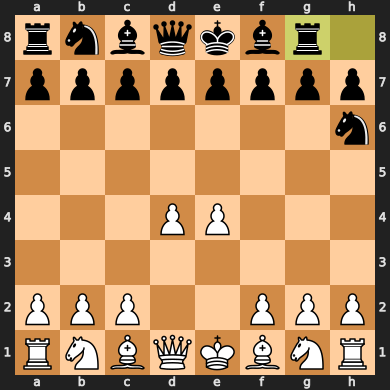

In [67]:
board

In [68]:
board.push_uci('c1h6')

Move.from_uci('c1h6')

In [69]:
play_move()

im here5
r n b q k b r .
p p p p p p p p
. . . . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
3
im here1
[]
im here2
[]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
2
im here1
[]
im here2
[]
im here5
r n b q k b . r
p p p p p p B p
. . . . . . . .
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[4]
im here1
[4, 1]
im here1
[4, 1, 4]
im here1
[4, 1, 4, 4]
im here1
[4, 1, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im h

im here1
[3, 3, 3]
im here1
[3, 3, 3, 0]
im here1
[3, 3, 3, 0, 3]
im here1
[3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . B
. . . . . . . .
. . . P P . . .
. . . B . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 0]
im here1
[3, 3,

im here1
[3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p p p
. . . . . . . B
. . . P . . . .
. . . . P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 0]
im here1
[3, 3, 3, 0, 3]
im here1
[3, 3, 3, 0, 3, 3]
im

im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here3
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h6g5
im here1
[3]
im here2
[3]
im here5
r . b q k b r .
p p p p p p p p
. . n . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
2
im here1
[]
im here2
[]
im here5
r . b q k b r .
p p p p p p B p
. . n . . . . .
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[4]
im here1
[4, 1]
im here1
[4, 1, 1]
im here1
[4, 1, 1, 4]
im here1
[4, 1, 

im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 2, 2, 2, 2, 2, 0, 0, 0]
im here2
[1, 2, 2, 2, 2, 2, 0, 0, 0]
im here5
r . b q k b r .
p p p p p p p p
B . n . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2]
im here1
[3, 3, 3, 3, 3, 2, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 0]
im here1
[3, 3, 3, 3

im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b r .
p p p p p p p p
. . n . . . . B
. . . . . . . .
. . . P P . . .
. . . Q . . . .
P P P . . P P P
R N . . K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2]
im here1
[3, 3, 3, 3, 3, 2, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 

im here1
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b r .
p p p p p p p p
. . n . . . . B
. . . . . . . .
. . . P P . . P
. . . . . . . .
P P P . . P P .
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2]
im here1
[3, 3, 3, 3, 3, 2, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3,

im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g8h8
im here1
[1, 3, 3]
im here2
[1, 3, 3]
im here5
r . b q k b r .
p p p p p p p p
n . . . . . . .
. . . . . . . .
. . . P P . . .
. . . . B . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0]
im here5
r . b q k b r .
p p p p p p p p
n . . . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . K P P P
R N . Q . B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 

im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b r .
p p p p p p p p
n . . . . . . B
. . . . P . . .
. . . P . . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]


im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r . b q k b r .
p p p p p p p p
n . . . . . . B
. . . . . . . .
. . P P P . . .
. . . . . . . .
P P . . . P P P
R N . Q K

im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -

im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im he

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-1, -

im here1
[3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
f8h6
im here1
[3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0]
im here2
[3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p p p . p
. . . . . . p B
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 0]
im here1
[3, 3, 3, 0, 3]
im here1
[3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3,

im here1
[3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
f8h6
im here1
[3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p p p . p
. . . . . . p B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P N . P P P
R . . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 

[3, 3, 3]
im here1
[3, 3, 3, 0]
im here1
[3, 3, 3, 0, 3]
im here1
[3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
f8h6
im here1
[3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p p p . p


im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g8h8
im here1
[1, 0, 3, 3]
im here2
[1, 0, 3, 3]
im here5
r n b q k b r .
p p p p p . p p
. . . . . p . .
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P B . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 

[3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p p . p p
. . . . . p . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P K . P P P
R N . Q . B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 

im here5
r n b q k b r .
p p p p p . p p
. . . . . p . B
. . . P . . . .
. . . . P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .

[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p p . p p
. . . . . p . B
. . . 

[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p . p p p
. . . . p . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . K P P P
R N . Q . B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 

im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1


im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p . p p p
. . . . p . . B
. . . . . . . .
. . . P P . . .
. . . . . P . .
P P P . . . P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3,

im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0]
im here5
r n b q k b r .
p p p . p p p p
. . . p . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . N P P P
R N . Q K B . R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3,

im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6]
im here1
[3, 3, 3, 3, 3, -6, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, -6, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, -6, 3, 3

im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3

im here5
r n b q k b r .
p p p . p p p p
. . . p . . . B
. . . . . . . .
. . . P P . . P
. . . . . . . .
P P P . . P P .
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 

[4]
im here1
[4, 1]
im here1
[4, 1, 1]
im here1
[4, 1, 1, 4]
im here1
[4, 1, 1, 4, 4]
im here1
[4, 1, 1, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here4
[4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
g8g7
im here1
[1]
im here2
[1]
im here5
r n b q k b r .
p p . p p p p p
. . p . . . . .
. . . . . . B .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im her

im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p . p p p p p
. . p . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . K P P P
R N . Q . B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im he

im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p . p p p p p
. . p . . . . B
. . . . . . . .
. . . P P . . .
N . . . . . . .
P P P . . P P P
R . . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3,

[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p . p p p p p
. . p . . . . B
. . . . . . . .
. . . P P . . P
.

im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0]
im here5
r n b q k b r .
p . p p p p p p
. p . . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . N P P P
R N . Q K B . R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 

im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p . p p p p p p
. p . . . . . B
. . . . . . . .
. . . P P . Q .
. . . . . . . .
P P P . . P P P
R N . . K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3

[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p . p p p p p p
. p . . . . . B
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P N . P P P
R . . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3,

im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p . p p p p p p
. p . . . . . B
. . . . . . . .
. . . P P . . P
. . . . . . . .
P P P . . P P .
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 

[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g8h8
im here1
[1, 3, 3, 3]
im here2
[1, 3, 3, 3]
im here5
r n b q k b r .
. p p p p p p p
p . . . . . . .
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P B . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here

[3, 3, 3, 0]
im here1
[3, 3, 3, 0, 3]
im here1
[3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
. p p p p p p p
p . . . . . . B
. . . . . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P P P
R N . . K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 0]
im here1
[3, 3, 3, 0, 3]
im here1
[3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3,

im here1
[3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
. p p p p p p p
p . . . . . . B
. . . . . . . .
. . . P P . . .
. . P . . . . .
P P . . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 0]
im here1
[3, 3, 3, 0, 3]
im her

im here2
[3]
im here5
r n b q k b r .
p p p p p p B p
. . . . . . . .
. . . . . . p .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 0]
im here1
[3, 0, 0]
im here1
[3, 0, 0, 3]
im here1
[3, 0, 0, 3, 3]
im here1
[3, 0, 0, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g8g

[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p p p . p
. . . . . . . B
. . . . . . p .
. . . P P . . .
. . . . . . . .
P P P . K P P P
R N . Q . B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4


im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
f8h6
im here1
[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b

im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
f8h6
im here1
[3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 2, 2, 2, 2, 2, 0]
im here2
[1, 2, 2, 2, 2, 2, 0]
im here5
r n b q k b r .
p p p p p . p p
. . . . . . . B
. . . . . p . .
. . . P P . . .
. . . . . N . .
P P P . . P P P
R N . Q K B . R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 

[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, -6, 0]
im here2
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, -6, 0]
im here5
r n b q k b r .
p p p p p . p p
. . . . . . . B
. . . . . p . .
. . . P P . . .
. . . Q . . . .
P P P . . P P P
R N . . K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im her

im here1
[3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, -6, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
im here2
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, -6, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
im here5
r n b q k b r .
p p p p p . p p
. . . . . . . B
. . . . . p . .
. . . P P . . .
. . . . . . P .
P P P . . P . P
R N . Q K B N R
[]
1
im here1
[]
im

im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here3
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, -6, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d1h5
im here1
[3, 3, 3, 0, 6, 3, 3, 3, 3, 3, 3, 6, 3]
im here2
[3, 3, 3, 0, 6, 3, 3, 3, 3

im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3,

im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 

im here1
[1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p p p . p p p
. . . . . . . B
. . . . p . . .
. . . P P . . .
. . . Q . . . .
P P P . . P P P
R N . . K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 

[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 

im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3

im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3

[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3

im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3,

im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3,

[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]

im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
c5d4
im here1
[1, 2, 2, 2, 2, 2]
im here2
[1, 2, 2, 2, 2, 2]
im here5
r n b q k b r .
p p . p p p p p
. . . . . . . B
. . p . . . . .
. . . P P . . .
. . . . . . . N
P P P . . P P P
R N . Q K B . R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0]
im her

im here5
r n b q k b r .
p p . p p p p p
. . . . . . . B
. . p . . . . .
. . . P P . . .
. . . . . . . .
P P P . K P P P
R N . Q . B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 

im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p . p p p p p
. . . . . . . B
. . p . . . . .
. . . P P . . .
. . . . . . . .
P P P

im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p p . p p p p p
. . . . . . . B
. . p . . . . .
. . . P P P . .
. . . . . . . .
P P P . . 

im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g8h8
im here1
[1, 3, 3, 3]
im here2
[1, 3, 3, 3]
im here5
r n b q k b r .
p . p p p p p p
. . . . . . . .
. p . . . . . .
. . . P P . . .
. . . . . . . .
P P P B . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 

im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p . p p p p p p
. . . . . . . B
. p . . . . . .
. . . P P . Q .
. . . . . . . .
P P P . . P P P
R N . . K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
i

[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p . p p p p p p
. . . . . . . B
. p . . . . . .
. . . P P . . .
. . . . . . P .
P P P . . P . P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3,

[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
p . p p p p p p
. . . . . . . B
. p . . . . . .
P . . P P . . .
. . . . . . . .
. P P . . P P P
R N . Q K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 2]
im here1
[3, 3, 3, 3, 3, 0, 2, 3]
im here1
[3, 3, 3, 3, 3, 0, 2, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 2, 3, 3, 3

im here1
[3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
b8a6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0]
im here5
r n b q k b r .
. p p p p p p p
. . . . . . . B
p B . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3

im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
. p p p p p p p
. . . . . . . B
p . . . . . . .
. . . P P . . .
. . . . . . . .
P P P Q . P P P
R N . . K B N R
[]
1
im here1
[]
im here1
[3]
im here1
[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3,

im here1
[3, 3, 3, 3, 3, 0]
im here1
[3, 3, 3, 3, 3, 0, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
. p p p p p p p
. . . . . . . B
p . . . . . . .
. . . P P . . .
. . . . . . P .
P P P . . P . P
R N . Q K B N R

im here1
[3, 3, 3, 3, 3, 0, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
g7h6
im here1
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b r .
. p p p p p p p
. . . . . . . B
p . . . . . . .
. P . P P . . .
. . . . . . . .
P . P . . P P P
R N . Q K B N R
[]
1

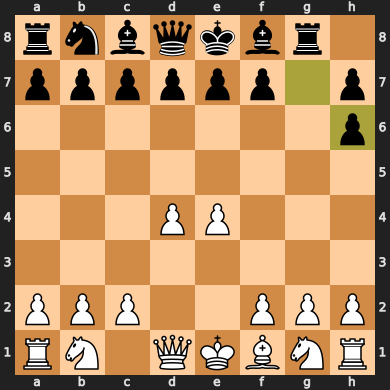

In [70]:
board

In [71]:
board.push_uci('f1c4')

Move.from_uci('f1c4')

In [72]:
play_move()

im here5
r n b q k b r .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
3
im here1
[]
im here2
[]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
2
im here1
[]
im here2
[]
im here5
r n b q k b . r
p p p p p B . p
. . . . . . . p
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here4
[-2]
e8f7
im here1
[-2]
im here2
[-2]
im here5
r n b q k b . r
p p p p p p . p
. . . . B . . p
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, -3, -3]
im here1
[0, 0, 0, 0, -3, -3, 0]
im here1
[0, 0, 0, 0, -3, -3, 0, 0]
im here1
[0, 0, 0, 0, -3, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, -3, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -3, -3, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[-2, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[-2, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . K P P P
R N . Q . . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0,

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[-2, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[-2, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . . p
. . . P . . . .
. . B . P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h8g8
im here1
[-2, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here2
[-2, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here5
r n b q k b . r
p p p p p p . p
. . . . . . . p
. . . . . . . .
. P B P P . . .
. . . . . . . .
P . P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . .
p p p p p p r p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . N . .
P P P . . P P P
R N . Q K . . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
i

[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . .
p p p p p p r p
. . . . . . . p
. . . P . . . .
. . B . P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0,

[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . .
p p p p p p r p
. . . . . . . p
. . . . . . . .
. . B P P . . .
P . . . . . . .
. P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g6g2
im here1
[-2, -3, -3, -1]
im here2
[-2, -3, -3, -1]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . r p
. B . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1


im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0,

R . . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0

im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g6g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . r p
. . . . . . . .
. . B P P . P .
. . . . . . . .
P P P . . P . P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f7e6
im here1
[-2, -3]
im here2
[-2, -3]
im here5
r n b q k b . .

[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0

im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[-2, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -9, -1]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . r .
. . B P P . . .
. . . Q . . . .
P P P . . P P P
R N . . K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1


im here1
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g5e5
im here1
[-2, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . P . . r .
. . B . P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,

[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0

[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g4e4
im here1
[-2, -3, -3, -1, -1]
im here2
[-2, -3, -3, -1, -1]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . . P P . r .
. . . B . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im

[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g4e4
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . r .
. . . . . . . .
P P P . N P P P
R N . Q K . . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here

[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 

im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1

im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, -3, 0, 0, 0, 0]
im 

[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 

R N . Q . . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1,

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g3c3
im here1
[-2, -3, -3, -1, -1, -3, -3, -1, -1, -3, -3, -1, -1, -1, -1, -1, -9, -9, -9, -1, -1, -1, -3]
im here2
[-2, -3, -3, -1, -1, -3, -3, -1, -1, -3, -3, -1, -1, -1, -1, -1, -9, -9, -9, -1, -1, -1, -3]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
N . . . . . r .
P P P . . P P P
R . . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g3f3
im here1
[-2, -3, -3, -1, -1, -3, -3, -1, -1, -3, -3, -1, -1, -1, -1, -1, -9, -9, -9, -1, -1, -1, -3, -3, -1, 5, 5, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -3, -3, -1, -1, -3, -3, -1, -1, -1, -1, -1, -9, -9, -9, -1, -1, -1, -3, -3, -1, 5, 5, -1, -1, -1, -1]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . P . . . r .
P P . . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im h

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g3g2
im here1
[-2, -3, -3, -1, -1, -3, -3, -1, -1, -3, -3, -1, -1, -1, -1, -1, -9, -9, -9, -1, -1, -1, -3, -3, -1, 5, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -3, -3, -1, -1, -3, -3, -1, -1, -1, -1, -1, -9, -9, -9, -1, -1, -1, -3, -3, -1, 5, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. .

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-3, -4, -4, -4, -4]
im here2
[-3, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . . P P . . .
. . . B . . . .
P P P . . P r P
R N . Q K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1

[-3, -4, -4, -4, -4, -4, -4, -4, -4, -2, -2, -2, -4]
im here2
[-3, -4, -4, -4, -4, -4, -4, -4, -4, -2, -2, -2, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P K . P r P
R N . Q . . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-3, -4, -4, -4, -4, -4, -4, -4, -4, -2, -2, -2, -4, -4, -4, -4, -

1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
i

[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7d4
im here1
[-2, -3, -3, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1]
im here5
r n b q k . r .
p p p p p p b p
. . . . . . . p
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . B P P P
R

[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7d4
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k . r .
p p p p p p b p
. . . . . . . p
. . . . . . . .
. . B P P . Q .
. . . . . . . .
P P P . . P P P
R N . . K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0

[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7d4
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -

im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7d4
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k . r .
p p p p p p b p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. P . . . . . .
P . P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1


[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g7d4
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k . r .
p p p p p p b p
. . . . . . . p
. . . . . . . .
P . B P P . . .
. . . . . . . .
. P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1]
im here5
r . b q k b r .
p p p p p p . p
. . n . . . . p
. . . . . . . .
. . . P P . . .
. B . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0]

im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r . b q k b r .
p p p p p p . p
. . n . . . . p
. . . . . . . Q
. . B P P . . .
. . . . . . . .
P P P . . P P P
R N . . K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r . b q k b r .
p p p p p p . p
. . n . . . . p
. . . . . . . .
. . B P P . . .
. . . . . . P .
P P P . . P . P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0,

im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, 0, -1, -1, -1]
im here2
[-2, -3, 0, -1, -1, -1]
im here5
r . b q k b r .
p p p p p p . p
n . . . . . . p
. . . . . . . .
. . . P P . . .
. B . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0

[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0,

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r . b q k b r .
p p p p p p . p
n . . . . . . p
. . . P . . . .
. . B . P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]


im here1
[0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g4
im here1
[-2, -3, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[5, -3, -3, -3, -1, -1, -1, -1, -1]
im here2
[5, -3, -3, -3, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
p p p p p . . p
. . . . . p . p
. . . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R
[]
1
i

im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g4
im here1
[5, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -9]
im here2
[5, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -9]
im here5
r n b q k b r .
p p p p p . . p
. . . . . p . p
. . . . . . . .
. . B P P . . .
. . . . . Q . .
P P P . . P P P
R N . . K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here

im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g3
im here1
[5, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[5, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
p p p p p . . p
. . . . . p . p
. . . . . . . .
. . B P P . . .
.

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here3
[5, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
c4g8
im here1
[0, 0, 0, 0, 5, 5, -1, 0, 0, 3, 5]
im here2
[0, 0,

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
p p p p . p . p
. . . . p . . p
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . N P P P
R N . Q K . . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1]
im here5
r n b q k b r .
p p p p . p . p
. . . . p . . p
. . . . . . . .
. . B P P . . .
. . . . . . P .
P P P . . P . P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1, 0,

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, 0, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, 0, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
p p p . p p . p
. . . p . . . p
. . . . . . . .
. . B P P . . .
. . . . . . P .
P P P . . P . P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im 

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, 0, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c6d5
im here1
[-2, -3, -3, -3]
im here2
[-2, -3, -3, -3]
im here5
r n b q k b r .
p p . p p p . p
. . p . . . . p
. B . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0

im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
p p . p p p . p
. . p . . . . p
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . . P P P
R N . Q . K N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
i

[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0,

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
p . p p p p . p
. p . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . N P P P
R N . Q K . . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -

im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f7e6
im here1
[-2, -3]
im here

[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -2, -1, -3, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -2,

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -2, -1, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1]
im here2
[-2, -3, -2, -1, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
. p p p p p . p
p . . . . . . p
. . . . . . . .


im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -2, -1, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -2, -1, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
. p p p p p . p
p . . . . . . p
. . . . . . . .
. . B P P . . .
. . P . . . . .
P P . . . P P P
R N . Q K . N R
[]
1
im here1

R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im her

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
p p p p p p . p
. . . . . . . .
. . . . . . . Q
. . B P P . . .
. . . . . . . .
P P P . . P P P
R N . . K . N R
[]
1
im here1
[]
im here1
[1]
im here1
[1, 1]
im here1
[1, 1, 1]
im here1
[1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 0]
im here1
[1, 1, 1, 1, 1, 1, 0, 1]
im here1
[1, 1, 1, 1, 1, 1, 0, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
im here1
[1, 1, 1, 1, 1, 1, 0, 1, 1,

im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -3, -1, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[4, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[4, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b 

[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im

1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here3
[4, -3, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -9, -1, -1, -1, -1, -

[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g4
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9]
im here5
r n b q k b r .
p p p p . p . p
. . . . . . . p
. . . . p . . .
. . B P P . . .
. . . . . Q . .
P P P . . P P P
R N . . K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -3, -1, 0, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, 

im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,

im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0]
im here1
[0, 

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d5c4
im here1
[-3, -2, 0, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -9, -3, -3]
im here2
[-3, -2, 0, -1, -1, -1, -1, -3, -3, 

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d5c4
im here1
[-3, -2, 0, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -9, -3, -3, -3, -3, -3, -3, -3, -3, 0, -3, -3, -3, -3, -3, -3, -3, -3]
im here2
[-3, -2, 0, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -9, -3, -3, -3, -3, -3, -3, -3, -3, 0, -3, -3, -3, -3, -3, -3, -3, -3]
im here5
r n b q k b r .
p p p . p p . p
. . . . . . . p
. . . p . . . .
. . B P P . P .
. . . . . . . .
P P P . . P . P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0]
im

im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3, -3, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3, -3, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3, -3, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3, -3, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3, -3, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3, -3, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -3, -3, -1, 0, 0, 0, 0, 

im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[

[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0,

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1]


im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
p p . p p p . p
. . . . . . . p
. . p . . . . .
. . B P P . . .
. P . . . . . .
P . P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, 

g8g2
im here1
[-2, -3, -1, 0, -1, -1, -1, -1]
im here2
[-2, -3, -1, 0, -1, -1, -1, -1]
im here5
r n b q k b r .
p . p p p p . p
. . . . . . . p
. p . . . . . .
. . B P P . . .
. . . . . . . N
P P P . . P P P
R N . Q K . . R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -

[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b5c4
im here1
[-2, -3, -1, 0, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -9, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3]
im here2
[-2, -3, -1, 0, -1, -1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -9, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3]
im here5
r n b q k b r .
p . p p p p . p
. . . . . . . p
. p . . . . . .
. . B P P . . .
. . . . . . P .
P P P . . P . P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1]
im here2
[-2, -3, -3, -1]
im here5
r n b q k b r .
. p p p p p . p
. . . . . . . p
p B . . . . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N . Q K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here5
r n b q k b r .
. p p p p p . p
. . . . . . . p
p . . . . . . .
. . B P P . . .
.

[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1]
im here2
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1]
im here5
r n b q k b r .
. p p p p p . p
. . . . . . . p
p . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . . P P P
R N Q . K . N R
[]
1
im here1
[]
im here1
[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, -1, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0,

[0, 0, 0, 0, 0, 0, -1, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here1
[-2, -3, -3, -1, -1, -1, -1

im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here4
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
g8g2
im here3
[-2, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
c4d5
im here4
[0, 0, 0, 0, 5, 5, -1, 0, 0, 3, 5, 0, 0, 0, 0, 0, 1, 5, 1, 0, 1, 1, 0]
g8g2


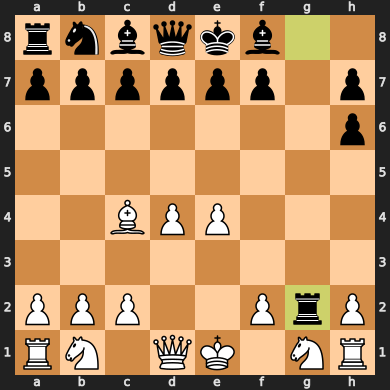

In [73]:
board

In [74]:
board.push_uci('d1f3')

Move.from_uci('d1f3')

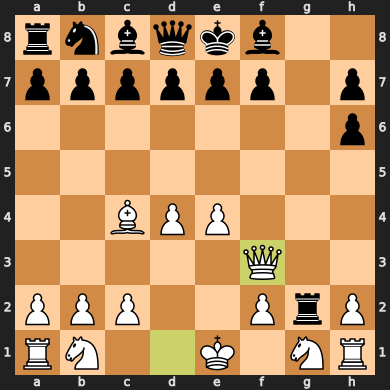

In [75]:
board

In [82]:
play_move()

im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
3
im here1
[]
im here2
[]
im here5
r n b q k . . .
p p p p p p b p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
2
im here1
[]
im here2
[]
im here5
r n b q k . . .
p p p p p B b p
. . . . . . . p
. . . . . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here4
[0]
e8f8
im here1
[0]
im here2
[0]
im here5
r n b q k . . .
p p p p p p b p
. . . . B . . p
. . . . . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, 

[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g7f6
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10]
im here2
[0

im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[

im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g7d4
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 3, -4, -4, -2]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 3, -4, -4, -2]
im here5
r n b q k . . .
p p p p p p b p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . Q . .
P P P . N P r P
R N . . K . . R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1]

im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, 

im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -2, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1

[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -

im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4]
im here5
r . b q k b . .
p p p p p p . p
. . n . . . . p
. . . . . Q . .
. . B P P . . .
. . . . . . . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -

im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4]
im here5
r . b q k b . .
p p p p p p . p
. . n . . . . p
. . . . . . . .
. . B P P . . .
. . Q . . . . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -2, -1, -1

im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1,

[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -4, -1, -1, -1, -1]
i

im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, 

im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, 

[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -

[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g8g1
im here1
[0, -4, -4, -4]
im here2
[0, -4, -4, -4]
im here5
r n b q k b r .
p p p p p p . p
. . . . . . . p
. B . . . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P . P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1

im here1
[-1, -1, -1, -1, -1, -10, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -10,

im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4]
im here5
r n b q k b r .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
Q . . . . . . .
P P P . . P . P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -

im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[

[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -

im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
e7f6
im here1
[-3, -4, -4, -4, -4, -4, -4, -4, -4, -9, -10]
im here2
[-3, -4, -4, -4, -4, -4, -4, -4, -4, -9, -10]
im here5
r n b q k b . .
p p p p p p r p
. . . . . . . p
. . . . . . 

1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1

R N . . . K N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1,

[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g7g1
im here1
[-3, -4, -4, -4, -4, -4, -4, -4, -4, -9, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, -10, -4, -4, -1, -1, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[-3, -4, -4, -4, -4, -4, -4, -4, -4, -9, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, -10, -4, -4, -1, -1, -4, -4, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p p p p r p
. . . . . . . p
. . . P . . . .
. . B . P . . .
. . . . . Q . .
P P P . . P . P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1

[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g7g1
im here1
[-3, -4, -4, -4, -4, -4, -4, -4, -4, -9, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, -10, -4, -4, -1, -1, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[-3, -4, -4, -4, -4, -4, -4, -4, -4, -9, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, -10, -4, -4, -1, -1, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p p p p r p
. . . . . . . p
. . . . . . . .
. P B P P . . .
. . . . . Q . .
P . P . . P . P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, 

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4


im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . r p
. . . . . . . .
. . B P P . . .
. . . . . . Q .
P P P . . P . P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10,

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g6g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4]
im here5
r n b q k b . .

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, 

im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1, -1, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -4, 

im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, 

[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -4, -1

[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -10, -10, -10, -4, -4, -10, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -10, -10, -10, -4, -4, -10, -4, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . r .
. . B P P . . .
. . Q . . . . .
P P P . . P . P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g5g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -10, -10, -10, -4, -4, 

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g5g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -10, -10, -10, -4, -4, -10, -4, -4, -4, -4, -4, -10, -4, -4, -1, -1, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -10, -10, -10, -4, -4, -10, -4, -4, -4, -4, -4, -10, -4, -4, -1, -1, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . r .
. . B P P . . .
. . . . . Q . .
P P P N . P . P
R . . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[

im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[

[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, 

im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g4g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, 4, -10, -4, -10, -4, -4, -4, -4, -4, -10, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, 4, -10, -4, -10, -4, -4, -4, -4, -4, -10, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . r .
. . . . . Q . .
P P P N . P . P
R . . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1


im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g3f3
im 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g3d3
im here1
[0, -10, -10, -10, -10, -10, -10, -10, -10, 0, -10, -4, -4, -10, -4, 4, -10, -10]
im here2
[0, -10, -10, -10, -10, -10, -10, -10, -10, 0, -10, -4, -4, -10, -4, 4, -10, -10]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . Q . . . r .
P P P . . P . P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g3g1
im here1
[0, -10, -10, -10, -10, -10, -10, -10, -10, 0, -10, -4, -4, -10, -4, 4, -10, -10, -10, -10, -10, -10, -4]
im here2
[0, -10, -10, -10, -10, -10, -10, -10, -10, 0, -10, -4, -4, -10, -4, 4, -10, -10, -10, -10, -10, -10, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . . r .
P P P . . P . P
R N . Q K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g3f3
im here1
[0, -10, -10, -10, -10, -10, -10, -10, -10, 0, -10, -4, -4, -10, -4, 4, -10, -10, -10, -10, -10, -10, -4, -4, -10, -10, -10, -10, -10, -10, -10]
im here2
[0, -10, -10, -10, -10, -10, -10, -10, -10, 0, -10, -4, 

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g3f3
im here1
[0, -10, -10, -10, -10, -10, -10, -10, -10, 0, -10, -4, -4, -10, -4, 4, -10, -10, -10, -10, -10, -10, -4, -4, -10, -10, -10, -10, -10, -10, -10, -10, -10, 4, 4, -10, -10]
im here2
[0, -10, -10, -10, -10, -10, -10, -10, -10, 0, -10, -4, -4, -10, -4, 4,

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -

im here1
[-2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, 

[-2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here4
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
h2h1
im here1
[-1, 

[-2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2,

im here1
[-2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, 

im here1
[-2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -7, -2, -2, -2, -2, -2, -2, 

[-2, -2, -5, -11, -3, -2, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2, -2, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -5, -11, -3, -2, -2, -2, -3, -2, -5, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here4
[-2, -2, -5, -11, -3, -2, -2, -2, 

[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
i

im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2

[3, 3]
im here1
[3, 3, 3]
im here1
[3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
im here4
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
f8g7
im here1
[-1, -11, -11, -11, -11, -11, -11, -11, -11, -10, -11, -3, -11, -3, -11, -3, -3, -3, -3, -3, -3, -3, -11, 3, -11, -3, -11, -11, 3]
im here2
[-1, -11, -11, -11, -11, -11, -11, -11, -11, -10, -11, -3, -11, -3, -11, -3, -3, -3, -3, -3, -3, -3, -11, 3, -11, -3, -11, -11, 3]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . Q . .
P P P . . r . P
R N . K . . N R
[]
1
im here1
[]
im here1
[-2]
i

[-2, -2, -2, -11, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -11, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -11, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -11, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here1
[-2, -2, -2, -11, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
im here4
[-2, -2, -2, -11, -3, -2, -2, -2, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
f2f3
im here1
[-1, -11, -11, -11, -11, -11, -11, -11, -11, -10, -11, -3, -11, -3, -11, -3, -3, -3, -3, -3, -3, -3, -11, 3, -11, -3, -11, -11, 3, -11, -11, -11, -11, -11, -11]
im here2
[-1, -11, -11, -11, -11, -11, -11, -11, -11, -10, -11, -3, -11, -3, -11, -3, -3, -3, -3, -3, -3, -3, -11, 3, -11, -3, -11, -11, 3, -11, -11, -11, -11, -11, -11]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . p
. . . . . . . .
. . B P P . . .
. . . . . Q . P
P P P . . r . .
R N . . K

[-4, -4]
im here1
[-4, -4, -4]
im here1
[-4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7, -4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7, -4, -4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7, -4, -4, -4, -4, -4, -4, -4]
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -7, -4, -4, -4, -4,

im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -1, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4]
im here2
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -1, -4, -10, -4, -4, -10

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2,

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -1, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -9, -1, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p p p . . p
. . . . . p . p
. . . . . . . .
. . B P P . . P
. . . . . Q . .
P P P . . P r .
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -10, 

im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-3, -4, -4, -4, -4, -4, -4, -4, -9, -10, -4, -10, -10, -4, -4, -10, -4, -4, -4, -4, -10, 4, -4]
im here2
[-3, -4, -4, -4, -4, -4, -4, -4, -9, -10, -4, -10, -10, -4, -4, -10, -4, -4, -4, -4, -10, 4, -4]
im here5
r n b q k b . .
p p p p . p . p
. . . . p . . p
. . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . . P r P
R N . Q K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[

im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1

im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]


[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g3
im here1
[0, -4, -4, -4, -1, -4, -4, -4, -4, 0, -10, -4, -10, -10, -4, -10, -

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -1, -4, -4, -4, -4, 0, -10, -4, -10, -10, -4, -10, -10, -4, -4, -4, -4, -4, 4, -4, -4, -4, -2, -4, -4, -4]
im here2
[0, -4, -4, -4, -1, -4, -4, -4, -4, 0, -10, -4, -10, -10, -4, -10, -10, -4, -4, -4, -4, -4, 4, -4, -4, -4, -2, -4, -4, -4]
im here5
r n b q k b . .
p p p . p p . p
. . . p . . . p
. . . . . . . .
. . B P 

im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -1, -4, -4, -4, -4, 0, -10, -4, -10, -10, -4, -10, -10, -4, -4, -4, -4, -4, 4, -4, -4, -4, -2, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -1, -4, -4, -4, -4, 0, -10, -4, -10, -10, -4, -10, -10, -4, -4, -4, -4, -4, 4, -4, -4, -4, -2, -4, -4, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p . p p . p
. . . p . . . p
. . . P . . . .
. . B . P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1,

im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1

im here2
[4, 4, 4, 0, -1, 0, 0, 4, 4, 3, 3, 1, 4, 4, 4]
im here5
r n b q k b . .
p p . p p p . p
. . p . . . . p
. . . . . . . .
. . B P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
2
im here1
[]
im here2
[]
im here5
im here1
[0]
im here2
[0]
im here5
r n b q k b . .
p p . p p p . p
. . p . B . . p
. . . . . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1,

[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
i

im here1
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g3
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10]
im here5
r n b q k b . .
p p . p p p . p
. . p . . . . p
. . . . . . . .
. . B P P . . .
. . . . Q . . .
P P P . . P r P
R N .

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

r n b q k b . .
p p . p p p . p
. . p . . . . p
. . . . . . . .
. . B P P . . .
. . . . . Q . .
P P P N . P r P
R . . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1,

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

[-1, -1, -4, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -4, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -4, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -4, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
c8a6
im here1
[0, -4, -4]
im here2
[0, -4, -4]
im here5
r n b q k b . .
p . p p p p . p
. p . . . . . p
. . . B . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
e7f6
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10]
im here5
r n b q k b . .
p . p p p p . p
. p . . . . . p
. . . . . . . Q
. . B P P . . .
. . . . . . . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im he

im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4]
im here5
r n b q k b . .
p . p p p p . p
. p . . . . . p
. . . . . . . .
. . B P P . . .
. . . Q . . . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -

[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
i

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4

[0]
im here1
[0, 0]
im here1
[0, 0, -3]
im here1
[0, 0, -3, 0]
im here1
[0, 0, -3, 0, -3]
im here1
[0, 0, -3, 0, -3, 0]
im here1
[0, 0, -3, 0, -3, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1, -3]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1, -3, -3]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1, -3, -3, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1, -3, -3, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1, -3, -3, 0, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1, -3, -3, 0, 0, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1, -3, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 0, 0, 0, -1, -1, -3, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, -3, 0, -3, 0, 0, 0, 

1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -3, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4]
im here2
[0, -4, -3, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
. p p p p p . p
p . . . . . . p
. . . . . . . .
. . B P P . . .
N . . . . Q . .
P P P . . P r P
R . . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1,

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -3, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -3, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4,

im here1
[0, -4, -4]
im here2
[0, -4, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . .
. . . B . . . p
. . . P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, 

im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4]
im here5
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0]
im here5
r n b q k b . .
p p p p p p . p
. . . . . Q . .
. . . . . . . p
. . B P P . . .
. . . . . . . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -10]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -10, -1]
im here1
[-1, -1, -

im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10]
im here1
[-1, -1, -1, -1, -10, -2]
im here1
[-1, -1, -1, -1, -10, -2, -2]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -10, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -3, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -3, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -3, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -3, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p p p p . p
. . . . . . . .
. . . . . . . p
. P B P P . . .
. . . . . Q . .
P . P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-4, -4, -4, -4, -4, -4, -4, -4]
im here2
[-4, -4, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p p p . . p
. . . . . . . p
. . . . . p . .
. . . P P . . .
. . . . . Q . .
P P P . B P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, 

im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -1, -3, -10, -4, -4, -10, -4, -4, -4, -4, -4, 3, -4]
im here2
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -1, -3, -10, -4, -4, -10, -4, -4, -4, -4, -4, 3, -4]
im here5
r n b q k b . .
p p p p p . . p
. . . . . . . p
. . . . . p . .
. . B P P . . .
. . . . . . . .
P P P . . P r P
R N . Q K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -

[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1,

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here4

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, 

im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -1, -1, -1, -1, -1, -1, -1, -1,

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, 

im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -2, -1, -1

im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, -1, -1

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-4, -3, -1, -4, -4, -4, -4]
im here2
[-4, -3, -1, -4, -4, -4, -4]
im here5
r n b q k b . .
p p p . p Q . p
. . . . . . . p
. . . p . . . .
. . B P P . . .
. . . . . . . .
P P P . . P r P
R N . . K . N R

im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -10]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10, -1]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10, -1, -2, -2, -4, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10, -1, -2, -2, -4, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -10, -1, -1, -1, -10, -1, -2, -2, -4, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10, -2, -2, -4, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1

R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1,

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -4, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[-4, -3, -1, -4, -4, -4, -4, -9, -10, -4, -10, -10, -4, -10, -10, -4, -4, -4, -4, -4, 1, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -3, -4, -4]
im here2
[-4, -3, -1, -4, -4, -4, -4, -9, -10, -4, -10, -10, -4, -10, -10, -4, -4, -4, -4, -4, 1, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -3, -4, -4]
im her

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, 

R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1,

g2g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4]
im here5
r n b q k b . .
p p . p p p . p
. . . . . . . p
. . p . . . . .
. . B P P . . .
. . Q . . . . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1,

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2h2
im h

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 3, -4, -4, -2, -2, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 3, -4, -4, -2, -2, -4, -4, -4, -4]
im here5
r n b q k b . .
p p . p p p . p
. . . . . . . p
. . p . . . . .
. . B 

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -2, -1, -1, -1, -1, 

[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 3, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -3, -4, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p p . p p p . p
. . . . . . . p
. . p . . . . .
. P B P P . . .
. . . . . Q . .
P . P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -

[0]
im here1
[0, 0]
im here1
[0, 0, 0]
im here1
[0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3, 0, 0, 0, 0, 0, 0, 0]
im here1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -3, 0, 0, 0, 0, 0, 0, 0, 0]


im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -3, -4, -4, -4, -4, 0, -10, -4, -4]
im here2
[0, -4, -4, -3, -4, -4, -4, -4, 0, -10, -4, -4]
im here5
r n b q k b . .
p . p p p p . p
. . . . . . . p
. p . . . . . .
. . B P P . Q .
. . . . . . . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -10]
im here1
[-1, -1, -1, -1, -1, -10, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -2]
im here1
[-1, -1, -1, -1, -1, -10, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -10, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -10, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -1, -1, -10, -1, -2, -2, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -10, -1, -2, -2, -4, -4, -1, -1]
i

im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1]
im here1
[

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -3, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 1, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -3, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 1, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
p . p p p p . p
. . . . . . . p
. p . . . . . .
. . B P P . . .
. . . . . Q . .
P P P . . P r P
R N . . . K N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, 

im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, 

im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4]
im here2
[0, -4, -4, -4]
im here5
r n b q k b . .
. p p p p p . p
. . . . . . . p
p B . . . . . .
. . . P P . . .
. . . . . Q . .
P P P . . P r P
R N . . K . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -

im here5
r n b q k b . .
. p p p p p . p
. . . . . . . p
p . . . . . . .
. . B P P . . .
. . . . . . . .
P P P . . P Q P
R N . . K . N R
[]
1
im here1
[]
im here1
[4]
im here1
[4, 4]
im here1
[4, 4, 4]
im here1
[4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here1
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
im here4
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
f8g7
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4]
im here5

[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4]
im here5
r n b q k b . .
. p p p p p . p
. . . . . . . p
p . . . . . . .
. . B P P . . .
. . . . . Q . .
P P P . . P r P
R N . K . . N R
[]
1
im here1
[]
im here1
[-1]
im here1
[-1, -1]
im here1
[-1, -1, -1]
im here1
[-1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4]
im here1
[-1, -1, -1, -1, -1, -1, -

im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
im here4
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
g2g1
im here1
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here2
[0, -4, -4, -4, -4, -4, -4, -4, -4, 0, -10, -4, -4, -10, -4, -4, -10, -4, -4, -4, -4, -4, 4, -4, -4, -2, -2, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]
im here5
r n b q k b . .
. p p p p p . 

In [91]:
def play_chess(board,move,is_human):
    if is_human:
        board.push_uci(move)
    else:
        play_move()
    return board

In [92]:
board = chess.Board()

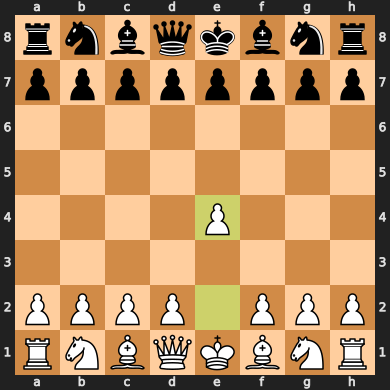

In [93]:
play_chess(board,'e2e4',True)

[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
[-1, -1, -1, -3, -1, -1, -1, -1, -1, -9, -9, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, -3, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, 0]
[-3, 0, 0, -3, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
[0, 0, 0, -3, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 

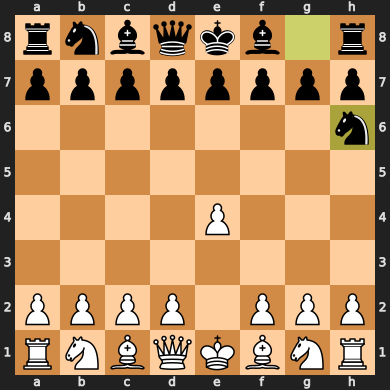

In [94]:
play_chess(board,'e2e4',False)

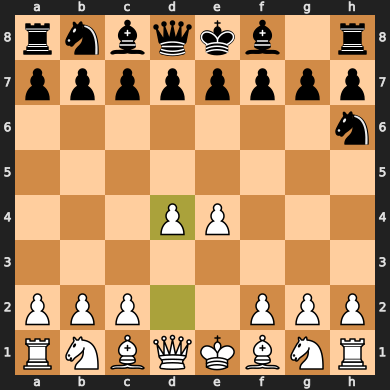

In [96]:
play_chess(board,'d2d4',True)

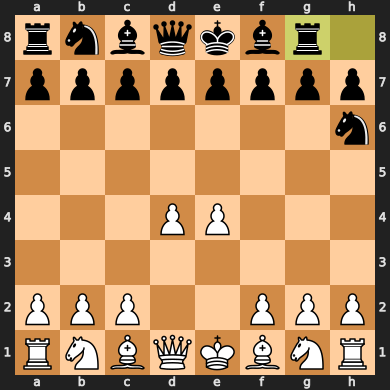

In [97]:
play_chess(board,'e2e4',False)

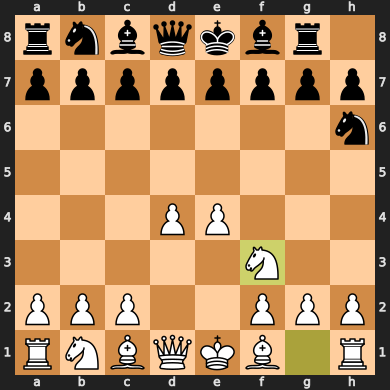

In [99]:
play_chess(board,'g1f3',True)

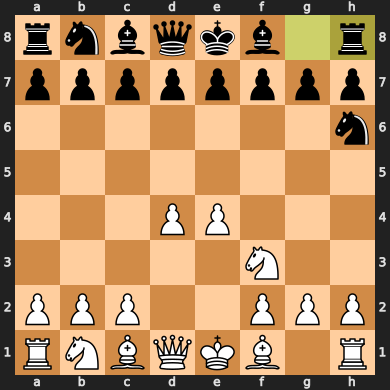

In [100]:
play_chess(board,'e2e4',False)

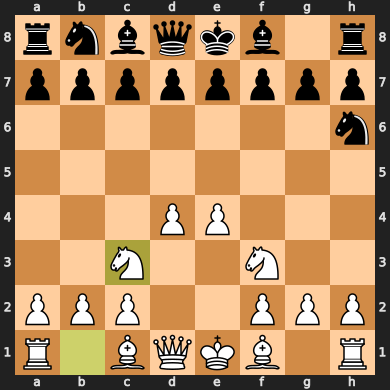

In [102]:
play_chess(board,'b1c3',True)

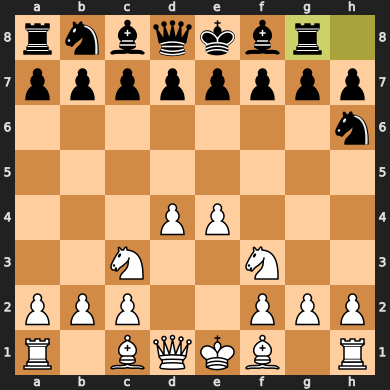

In [103]:
play_chess(board,'b1c3',False)

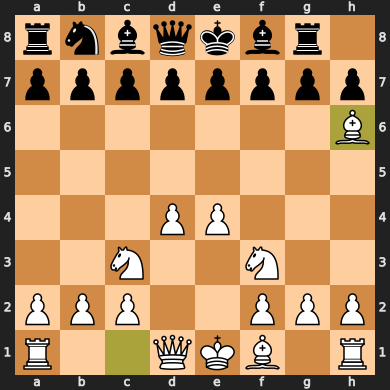

In [104]:
play_chess(board,'c1h6',True)

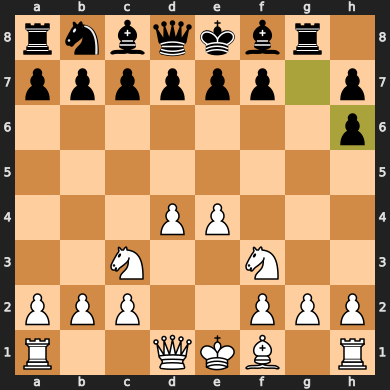

In [105]:
play_chess(board,'c1h6',False)

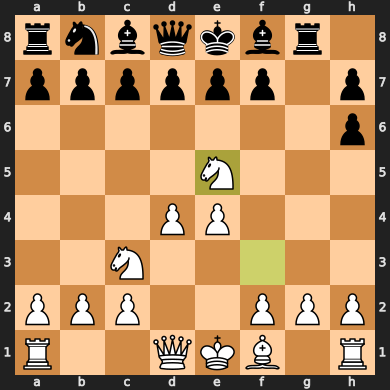

In [106]:
play_chess(board,'f3e5',True)

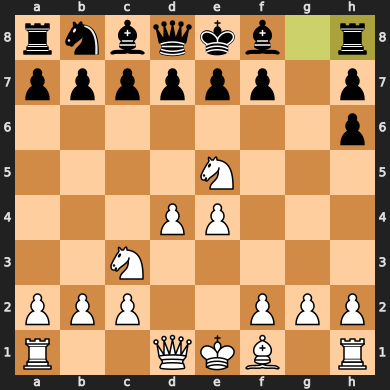

In [107]:
play_chess(board,'f3e5',False)

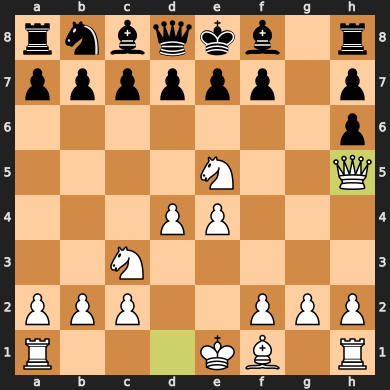

In [108]:
play_chess(board,'d1h5',True)

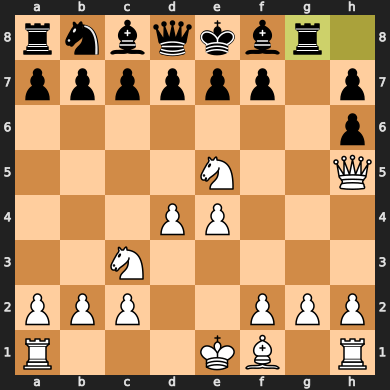

In [109]:
play_chess(board,'d1h5',False)

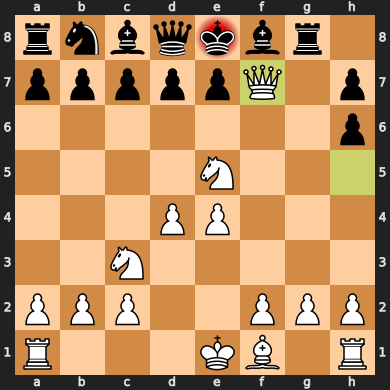

In [110]:
play_chess(board,'h5f7',True)